In [21]:
from typing import List, TypedDict
from langgraph.graph import StateGraph, START, END
import random

In [22]:
class AgentState(TypedDict):
    lower_bound:int
    upper_bound:int
    guesses:List[int]
    attempts:int
    player_name:str
    target_number:int

In [23]:
def setup_node(state:AgentState)->AgentState:
    state['lower_bound'] = 1
    state['upper_bound'] = 20
    state['attempts'] = 0
    state['guesses'] = []
    if not state['player_name']:
        state['player_name'] = "player"
    if state['target_number'] not in range(state['lower_bound'], state['upper_bound'] + 1):
        print("provided target was not in the bound range")
        new_target = random.randint(state['lower_bound'], state['upper_bound'])
        print(f"new target is: {new_target}")
        state["target_number"] = new_target
    print("setup complete")
    print(state)
    return state

In [24]:
def guess_node(state:AgentState)->AgentState:
    current_guess = random.randint(state['lower_bound'], state['upper_bound'])
    state['guesses'].append(current_guess)
    state['attempts'] += 1 
    return state

In [25]:
def hint_node(state:AgentState)->AgentState:
    latest_guess = state['guesses'][-1]

    if latest_guess == state['target_number']:
        print("correctly guessed")
    
    elif latest_guess < state['target_number']: #eg guess:4 actual:6
        print(f"guess {latest_guess} was less than {state['target_number']}")
        print(f"setting lower bound to {state['guesses'][-1]+1}")
        state["lower_bound"] = state["guesses"][-1]+1

    else: #latest_guess > state['target_number']: #eg guess:4 actual:2
        print(f"guess {latest_guess} was greater than {state['target_number']}")
        print(f"setting upper bound to {state['guesses'][-1]-1}")
        state["upper_bound"] = state["guesses"][-1]-1
    
    return state


In [26]:
def should_continue(state:AgentState)->str:
    latest_guess = state["guesses"][-1]
    if latest_guess == state["target_number"]:
        print(f"GAME OVER: Number found!")
        return "exit"
    
    if state['attempts'] > 7:
        print("the system was unable to guess the number")
        return "exit"
    else:
        return "loop"

    


In [27]:
graph = StateGraph(AgentState)
graph.add_node("setup", setup_node)
graph.add_node("guess", guess_node)
graph.add_node("hint",hint_node)

graph.add_edge(START, "setup")
graph.add_edge("setup","guess")
graph.add_edge("guess","hint")

graph.add_conditional_edges(
    source="hint",
    path=should_continue,
    path_map={
        "loop":"guess",
        "exit":END
    }
)
app = graph.compile()

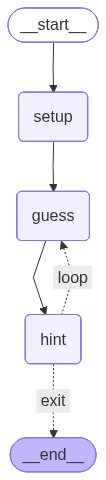

In [28]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [29]:
res = app.invoke(
    {
        'lower_bound':1,
        'upper_bound':20,
        'player_name':"Utsav",
        'target_number':8
    }
)

setup complete
{'lower_bound': 1, 'upper_bound': 20, 'player_name': 'Utsav', 'target_number': 8, 'attempts': 0, 'guesses': []}
guess 7 was less than 8
setting lower bound to 8
guess 16 was greater than 8
setting upper bound to 15
guess 13 was greater than 8
setting upper bound to 12
guess 9 was greater than 8
setting upper bound to 8
correctly guessed
GAME OVER: Number found!
